# Dimensionality Reduction (PCA) and Applying Clustering (K-Means)

### Objective:
 - To categorise the countries using socio-economic and health factors that determine the overall development of the country.

### About organization:
 - HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities.

### Problem Statement:
 - HELP International have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. So, CEO has to make decision to choose the countries that are in the direst need of aid. Hence, your Job as a Data scientist is to categorise the countries using some socio-economic and health factors that determine the overall development of the country. Then you need to suggest the countries which the CEO needs to focus on the most.
 
 ***Kaggle link***:
 https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from yellowbrick.cluster import SilhouetteVisualizer

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load datasets
data = pd.read_csv('data/Country-data.csv')

*Dataset null value, duplicate etc. check was already done on the K-Means notebook.*

In [4]:
# remove categorical feature column "Country"
data = data.drop('country', axis=1)

In [5]:
# To use scaled data for clustering purposes, let's standardize our data
sc = StandardScaler()
scaled_data = sc.fit_transform(data)

## Principal Component Analysis

In [6]:
# PCA object
pca = PCA(svd_solver='auto') # singular value decomposition solver "auto" to get the no. of pcs. Can also use solver "randomized" introducing a random state seed like "42"
# fit on data
pca.fit(scaled_data)

PCA()

In [9]:
# total no. of principal components
pca.n_components_

9

### Principle component Variance Ratio

In [10]:
# Variance explained from each principal component
var_ratio = pca.explained_variance_ratio_
var_ratio

array([0.4595174 , 0.17181626, 0.13004259, 0.11053162, 0.07340211,
       0.02484235, 0.0126043 , 0.00981282, 0.00743056])

Text(0, 0.5, 'Explained Variance Ratio')

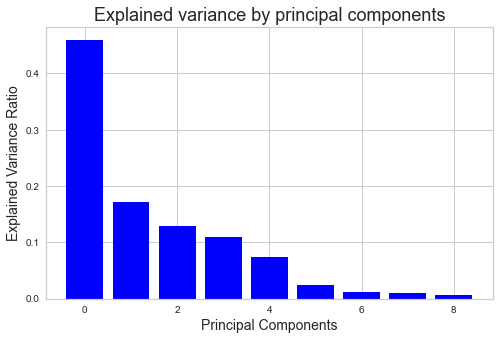

In [18]:
# Plot explained variance ratio for each principal component
plt.figure(figsize=(8,5))
plt.bar([pc for pc, _ in enumerate(var_ratio)], var_ratio, color='blue')
plt.title('Explained variance by principal components', fontsize = 18)
plt.xlabel('Principal Components', fontsize = 14)
plt.ylabel('Explained Variance Ratio',fontsize = 14)

#### First & Second PCs explain around 46% and 17% variance respectively.

### Cumulative Variance

In [23]:
# cumulative variance explained by each PC
cum_var = np.cumsum(var_ratio*100)
cum_var

array([ 45.95173979,  63.13336544,  76.13762433,  87.19078614,
        94.53099756,  97.01523224,  98.27566264,  99.25694438,
       100.        ])

Text(0, 0.5, 'Cumulative Variance (%)')

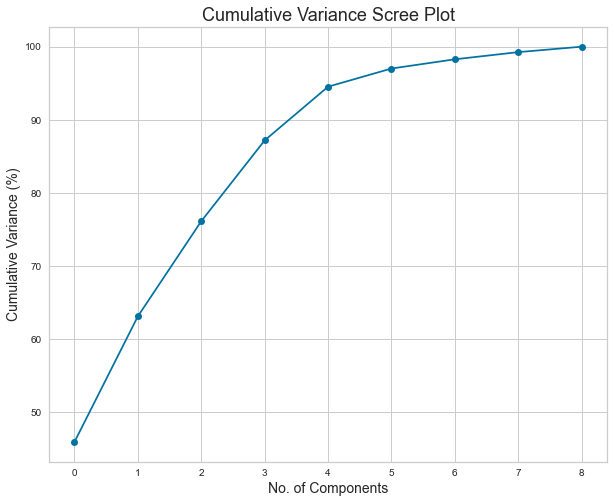

In [25]:
# Plot cumulative variance explained by each PC
plt.figure(figsize=(10,8))
plt.plot(cum_var, marker='o')
plt.title('Cumulative Variance Scree Plot', fontsize = 18)
plt.xlabel('No. of Components', fontsize = 14)
plt.ylabel('Cumulative Variance (%)',fontsize = 14)

#### Notice from the scree plot, the first 4 principal components explains more than 90% of the variance. Less information is stored from 5th principal component onwards.

### PCA for 2 principal components

In [26]:
# PCA for 2 PC
pca_ = PCA(n_components=2)
# fit and transform on data
pca_data = pca_.fit_transform(scaled_data)

# store pca_data to a data frame
pca_dataset = pd.DataFrame(data = pca_data, columns = ['principal component 1', 'principal component 2'])

#### Plot 2 pcs

Text(0, 0.5, 'Principal Component 2')

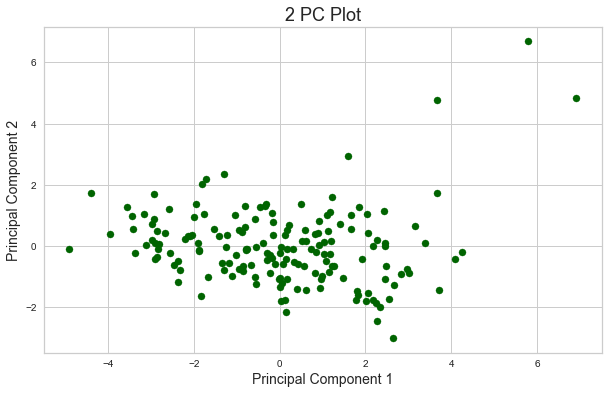

In [28]:
plt.figure(figsize=(10,6))
# plot the figure
plt.scatter(pca_dataset['principal component 1'], pca_dataset['principal component 2'], c='darkgreen', s = 50)
plt.title('2 PC Plot', fontsize = 18)
plt.xlabel('Principal Component 1', fontsize = 14)
plt.ylabel('Principal Component 2', fontsize = 14)

In [ ]:
### Apply K-Means on this PC